In [259]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [260]:
# Load dataset
data = pd.read_csv("C:/Users/Begad/Downloads/train.csv (1).zip")

In [261]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [262]:
data.shape

(42000, 785)

In [263]:
data.columns[:10]

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8'],
      dtype='object')

In [264]:
data.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

In [265]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [266]:
data.duplicated().any()

False

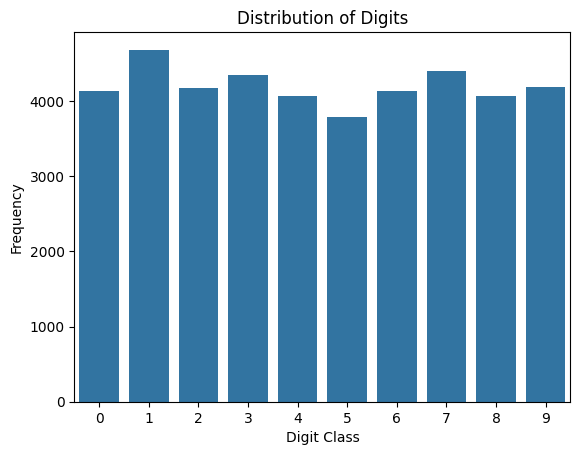

In [267]:
# Label Distribution
#To understand the distribution of pixel intensities across the entire dataset.
#Check if most pixels are white (value near 0) or black (value near 255), and how many pixels have different
#  intensity levels. This helps in understanding the spread of values.
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=data['label'])
plt.title("Distribution of Digits")
plt.xlabel("Digit Class")
plt.ylabel("Frequency")
plt.show()


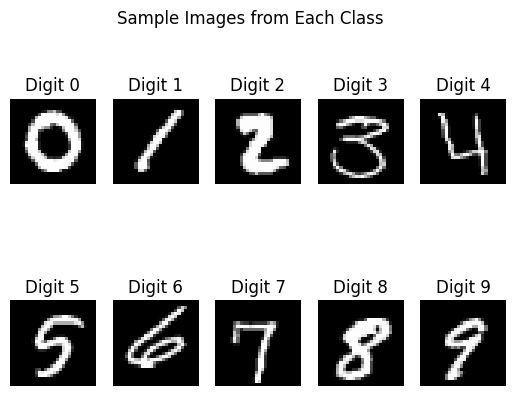

In [268]:
#. Visualizing Sample Digits
#To visually verify that the images are correctly labeled and represent the corresponding digit.
import matplotlib.pyplot as plt

for i in range(10):
    img = data[data['label'] == i].iloc[0, 1:].values.reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f'Digit {i}')
    plt.axis('off')

plt.suptitle("Sample Images from Each Class")
plt.show()


In [ ]:
#Pixel Value Distribution
#To check the distribution of the target classes (digits 0–9) in the dataset.
# Determine if the dataset is balanced or imbalanced across the different digit classes. 
# Imbalanced datasets can cause model biases toward more frequent classes.
pixels = data.drop('label', axis=1).values.flatten()
sns.histplot(pixels, bins=50, kde=True)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Separate the features (pixel values) and the labels (targets)
X = data.drop('label', axis=1).values  # Remove the label column to get features only
Y = data['label'].values               # Extract only the label column

In [ ]:
# Convert to NumPy array (if not already)
data = np.array(data)

# Get number of rows (examples) and columns (features + label)
m, n = data.shape
print("Data shape (with labels):", data.shape)

Data shape (with labels): (42000, 785)


In [ ]:
# Shuffle the data randomly to avoid any order bias
np.random.shuffle(data)

In [ ]:
# Split test data (first 1000 examples)
data_test = data[0:1000].T         # Transpose to shape: (features, examples)
Y_test = data_test[0]              # First row is labels
X_test = data_test[1:n]            # Remaining rows are pixel data
X_test = X_test / 255.             # Normalize pixel values to [0

In [ ]:
# Split training data (remaining examples)
data_train = data[1000:m].T        # Transpose training data
Y_train = data_train[0]            # First row is labels
X_train = data_train[1:n]          # Remaining rows are pixel data
X_train = X_train / 255.           # Normalize training pixel values

In [ ]:
print(f'x training samples{X_train.shape}')
print(f'x testing samples{X_test.shape}')
print(f'Y training samples{Y_train.shape}')
print(f'Y testing samples{Y_test.shape}')

x training samples(784, 41000)
x testing samples(784, 1000)
Y training samples(41000,)
Y testing samples(1000,)


In [ ]:
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2


def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2
    return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 100 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.1, 1000)
#first learning rate = 0.01 and the acc through 500 iteration was 0.44
# so we will increae the number of iter = 1000 and the learning rate to 0.1 to be faster and also monitoring the acc

Iteration:  0
[4 5 9 ... 5 9 0] [3 4 2 ... 5 3 9]
0.07909756097560976
Iteration:  100
[4 4 9 ... 6 9 9] [3 4 2 ... 5 3 9]
0.2710487804878049
Iteration:  200
[7 4 2 ... 6 3 9] [3 4 2 ... 5 3 9]
0.6533170731707317
Iteration:  300
[9 4 2 ... 6 3 9] [3 4 2 ... 5 3 9]
0.7730975609756098
Iteration:  400
[9 4 2 ... 6 3 9] [3 4 2 ... 5 3 9]
0.8190243902439024
Iteration:  500
[9 4 2 ... 6 3 9] [3 4 2 ... 5 3 9]
0.842390243902439
Iteration:  600
[9 4 2 ... 6 3 9] [3 4 2 ... 5 3 9]
0.8570731707317073
Iteration:  700
[8 4 2 ... 6 3 9] [3 4 2 ... 5 3 9]
0.8656829268292683
Iteration:  800
[8 4 2 ... 6 3 9] [3 4 2 ... 5 3 9]
0.8719024390243902
Iteration:  900
[8 4 2 ... 6 3 9] [3 4 2 ... 5 3 9]
0.8774146341463415


In [ ]:

def initialize_adam(params):
    v = [np.zeros_like(p) for p in params]  # Initialize v (momentum) as zeros
    s = [np.zeros_like(p) for p in params]  # Initialize s (velocity) as zeros
    return v, s

def adam_update(params, grads, v, s, t, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8):
    updated_params = []
    for i, (param, grad) in enumerate(zip(params, grads)):
        v[i] = beta1 * v[i] + (1 - beta1) * grad  # Update the first moment estimate (v)
        s[i] = beta2 * s[i] + (1 - beta2) * (grad ** 2)  # Update the second moment estimate (s)

        # Bias correction to prevent v and s from being biased towards zero
        v_corrected = v[i] / (1 - beta1 ** t)
        s_corrected = s[i] / (1 - beta2 ** t)

        # Update parameters using the corrected first and second moment estimates
        param -= learning_rate * v_corrected / (np.sqrt(s_corrected) + epsilon)
        updated_params.append(param)

    return updated_params, v, s


In [ ]:
def train_adam(X, Y, iterations=1000, alpha=0.001):
    # Initialize parameters (weights and biases)
    W1, b1, W2, b2 = init_params()
    params = [W1, b1, W2, b2]

    # Initialize Adam variables (v and s)
    v, s = initialize_adam(params)

    loss_history = []  # To track the loss at each iteration

    # Iterate through the training process
    for t in range(1, iterations + 1):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_prop(*params, X)

        # Compute cross-entropy loss
        loss = -np.mean(np.log(A2[Y.astype(int), range(Y.size)]))
        loss_history.append(loss)

        # Backpropagation
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, params[0], params[2], X, Y)
        grads = [dW1, db1, dW2, db2]

        # Update parameters using Adam optimizer
        params, v, s = adam_update(params, grads, v, s, t, learning_rate=alpha)

        # Monitor training progress every 100 iterations
        if t % 100 == 0:
            predictions = get_predictions(A2)
            acc = get_accuracy(predictions, Y)
            print(f"Iteration {t}, Loss: {loss:.5f}, Accuracy: {acc:.4f}")

    return *params, loss_history  # Return the updated parameters and loss history

# Train the model on the training data
W1, b1, W2, b2, loss_history = train_adam(X_train, Y_train, iterations=2000, alpha=0.001)


[8 4 2 ... 3 3 8] [3 4 2 ... 5 3 9]
Iteration 100, Loss: 1.28650, Accuracy: 0.5969
[8 4 2 ... 5 3 7] [3 4 2 ... 5 3 9]
Iteration 200, Loss: 0.70972, Accuracy: 0.7845
[8 4 2 ... 5 3 7] [3 4 2 ... 5 3 9]
Iteration 300, Loss: 0.50885, Accuracy: 0.8486
[8 4 2 ... 5 3 7] [3 4 2 ... 5 3 9]
Iteration 400, Loss: 0.42645, Accuracy: 0.8740
[8 4 2 ... 5 3 7] [3 4 2 ... 5 3 9]
Iteration 500, Loss: 0.37730, Accuracy: 0.8902
[8 4 2 ... 5 3 9] [3 4 2 ... 5 3 9]
Iteration 600, Loss: 0.34399, Accuracy: 0.9001
[8 4 2 ... 5 3 9] [3 4 2 ... 5 3 9]
Iteration 700, Loss: 0.31972, Accuracy: 0.9076
[8 4 2 ... 5 3 9] [3 4 2 ... 5 3 9]
Iteration 800, Loss: 0.30104, Accuracy: 0.9138
[8 4 2 ... 5 3 9] [3 4 2 ... 5 3 9]
Iteration 900, Loss: 0.28612, Accuracy: 0.9180
[8 4 2 ... 5 3 9] [3 4 2 ... 5 3 9]
Iteration 1000, Loss: 0.27350, Accuracy: 0.9225
[8 4 2 ... 5 3 9] [3 4 2 ... 5 3 9]
Iteration 1100, Loss: 0.26249, Accuracy: 0.9261
[8 4 2 ... 5 3 9] [3 4 2 ... 5 3 9]
Iteration 1200, Loss: 0.25278, Accuracy: 0.9290
[

In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Let's look at a couple of examples:

Prediction:  [8]
Label:  3


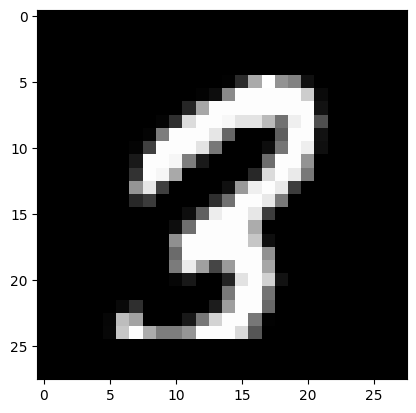

Prediction:  [4]
Label:  4


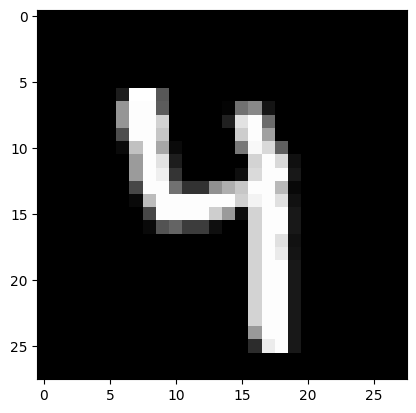

Prediction:  [2]
Label:  2


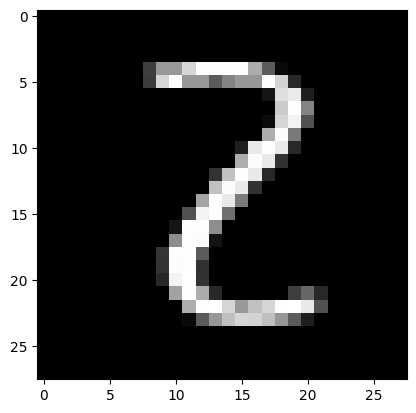

Prediction:  [0]
Label:  0


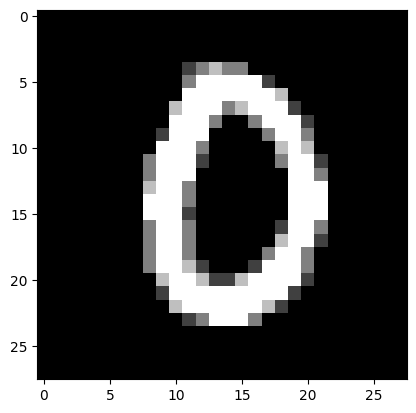

In [ ]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Finally, let's find the accuracy on the dev set:

In [ ]:
dev_predictions = make_predictions(X_test, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_test)

[0 8 2 6 6 8 1 4 4 1 3 1 1 3 1 1 9 9 8 2 0 1 3 9 0 5 7 7 4 6 1 0 6 9 9 9 6
 6 8 8 1 8 9 0 3 4 8 4 8 1 7 8 6 5 6 1 0 7 8 0 6 6 8 2 9 2 8 6 3 3 9 2 1 0
 2 3 0 3 4 2 9 8 0 5 4 6 4 6 6 8 1 1 2 0 1 0 8 6 5 8 5 8 7 8 1 4 5 8 5 0 7
 2 5 8 5 6 4 3 3 9 3 3 3 7 9 4 1 3 6 1 3 4 8 3 7 3 5 4 2 9 1 7 3 6 7 3 9 9
 0 7 4 9 9 7 2 7 2 6 6 4 6 9 6 3 5 4 4 7 0 7 2 1 7 4 2 5 6 0 1 2 9 1 1 6 0
 6 7 8 2 7 1 0 7 4 6 4 7 0 4 9 4 6 0 0 9 4 9 4 8 4 9 2 7 2 3 8 1 2 5 9 7 1
 9 3 0 6 8 5 7 1 2 6 9 6 2 3 6 4 4 9 1 2 8 5 1 3 0 5 9 0 9 9 5 0 3 0 2 3 8
 8 9 3 2 2 9 7 0 1 2 3 2 6 1 5 4 5 3 0 3 3 3 8 9 7 0 7 2 6 8 3 0 7 9 4 9 9
 0 7 9 3 9 9 3 8 8 2 9 8 8 9 9 6 0 9 3 5 6 4 3 7 3 3 2 9 8 4 5 3 6 4 3 9 5
 2 1 2 2 5 8 2 4 1 4 1 8 7 1 4 1 0 2 1 3 0 5 4 1 9 7 1 6 7 5 7 1 7 8 4 8 9
 7 1 8 1 6 1 4 0 0 1 0 6 8 1 9 1 8 9 5 2 1 0 0 6 0 8 9 4 3 1 6 9 8 0 3 3 8
 9 4 4 6 6 8 8 2 6 7 9 8 0 3 2 2 4 6 1 8 1 4 4 7 0 0 5 1 2 2 5 5 9 0 0 4 0
 4 5 7 8 4 3 2 1 0 5 2 7 8 6 0 9 3 9 1 3 1 9 2 6 4 0 9 5 1 3 6 3 2 8 5 4 4
 9 9 4 9 4 6 7 8 3 3 8 4 

0.919

#**about our trials**
we worked with another data firstly and used mini batch in learning and tried all possible learning rates and the max **acc =** **0.34** then we searched for another ways and also the acc still the same so we changed the data and worked with another data -< mnist also we needed everything from the scratch so we splitted the data manually and then get x_train , x_test .... y_train , y_test then normalized data to be easier for the model to work with digits between [0,1] then wrote the algorithm we typically used matrix form as we took in the lec  , the first trial was with learning rate = 0.01 and number of iterations = 500 the progress was too small and slow but still there was a progress then we tried to change the learning rate with = 0.1 (increased) and number of iterations =1000 the progress was amazing and the acc - = 87%  , but it had taken 4m and 38sec in running maybe after adding the optimizer it deals with this part (time)